## Train Test Split

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# load data
dft_feature_df = pd.read_csv('feature_data/dft_featurized.csv')
exp_feature_df = pd.read_csv('feature_data/exp_featurized.csv')

In [3]:
dft_feature_df.head()

,composition_str,band_gap,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ac1Ag1Te2,0.07940,Ac1 Ag1 Te2,47.0,89.0,42.0,60.0,14.50,52.0,14.0,...,0.0,0.0,0.0,0.0,152.0,225.0,73.0,188.500000,36.500000,152.0
1,Ac1Al1O3,4.10240,Ac1 Al1 O3,8.0,89.0,81.0,25.2,25.52,8.0,14.0,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,97.200000,102.240000,12.0
2,Ac1Br1O1,4.24100,Ac1 Br1 O1,8.0,89.0,81.0,44.0,30.00,8.0,14.0,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,100.333333,83.111111,12.0
3,Ac1Br3,4.10585,Ac1 Br3,35.0,89.0,54.0,48.5,20.25,35.0,14.0,...,0.0,0.0,0.0,0.0,64.0,225.0,161.0,104.250000,60.375000,64.0
4,Ac1Cl1O1,4.44510,Ac1 Cl1 O1,8.0,89.0,81.0,38.0,34.00,8.0,14.0,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,100.333333,83.111111,12.0


In [4]:
dft_feature_df.describe()

,band_gap,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
count,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,...,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000,51913.000000
mean,2.274264,9.439254,50.598020,41.158766,20.691218,11.601866,12.725271,22.731801,89.237416,66.505615,...,0.196685,0.026028,0.042233,0.000768,29.928920,220.197677,190.268757,100.401870,74.361579,46.098646
std,1.479284,8.579347,20.903634,20.083286,11.601811,7.123166,12.040889,26.644043,3.797382,26.209700,...,0.566162,0.090551,0.137252,0.038291,44.994681,21.650971,49.818667,40.681023,25.482346,63.329260
min,0.000100,1.000000,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,0.000000,7.142857,0.000000,2.000000
25%,1.059400,5.000000,32.000000,24.000000,12.125000,5.812500,8.000000,2.000000,87.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,225.000000,180.000000,74.000000,60.666667,12.000000
50%,2.146600,8.000000,51.000000,40.000000,17.500000,9.960000,8.000000,8.000000,88.000000,80.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,229.000000,215.000000,94.500000,80.625000,12.000000
75%,3.326600,9.000000,68.000000,56.000000,26.444444,16.265306,12.000000,46.000000,92.000000,86.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,229.000000,217.000000,119.833333,94.275992,64.000000
max,5.998400,83.000000,94.000000,93.000000,86.000000,41.000000,90.000000,96.000000,102.000000,101.000000,...,2.110663,1.125687,1.055331,2.110663,229.000000,229.000000,227.000000,229.000000,113.500000,229.000000


### Remove High Related Features

In [5]:
# View the correlation matrix between different columns. 
corr_matrix = dft_feature_df.drop(columns=['composition_str', 'composition']).corr()

In [6]:
# Find the pairs of columns with a correlation greater than 0.95 (excluding the correlation of a column with itself). 
highly_correlated = []
for i, col1 in enumerate(corr_matrix.columns):
    for j, col2 in enumerate(corr_matrix.columns):
        if i < j and abs(corr_matrix.iloc[i, j]) > 0.95:
            highly_correlated.append((col1, col2, corr_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(highly_correlated, 
                           columns=['Feature_1', 'Feature_2', 'correlation'])
high_corr_df = high_corr_df.sort_values('correlation', ascending=False)

print(f"totally {len(high_corr_df)} pais of features with correlation > 0.95")
high_corr_df
    

totally 32 pais of features with correlation > 0.95


,Feature_1,Feature_2,correlation
25,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,1.000000
30,MagpieData maximum GSmagmom,MagpieData range GSmagmom,1.000000
23,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,0.999962
19,MagpieData maximum NfValence,MagpieData range NfValence,0.999707
1,MagpieData maximum Number,MagpieData maximum AtomicWeight,0.999322
3,MagpieData mean Number,MagpieData mean AtomicWeight,0.998942
6,MagpieData mode Number,MagpieData mode AtomicWeight,0.998486
5,MagpieData avg_dev Number,MagpieData avg_dev AtomicWeight,0.997940
21,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,0.997916
29,MagpieData maximum GSbandgap,MagpieData range GSbandgap,0.997508


In [7]:
# remove one of the features from a pair of features with a relatively high correlation.
dft_feature_df = dft_feature_df.drop(columns=high_corr_df['Feature_1'].values)

In [8]:
print(dft_feature_df.shape)
dft_feature_df.head()

(51913, 108)


,composition_str,band_gap,composition,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,...,MagpieData minimum GSmagmom,MagpieData range GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ac1Ag1Te2,0.07940,Ac1 Ag1 Te2,90.0,76.0,64.750000,25.375000,90.0,107.8682,227.0,...,0.0,0.0,0.0,0.0,152.0,225.0,73.0,188.500000,36.500000,152.0
1,Ac1Al1O3,4.10240,Ac1 Al1 O3,87.0,73.0,69.600000,22.240000,87.0,15.9994,227.0,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,97.200000,102.240000,12.0
2,Ac1Br1O1,4.24100,Ac1 Br1 O1,95.0,81.0,65.333333,34.222222,14.0,15.9994,227.0,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,100.333333,83.111111,12.0
3,Ac1Br3,4.10585,Ac1 Br3,95.0,81.0,74.750000,30.375000,95.0,79.9040,227.0,...,0.0,0.0,0.0,0.0,64.0,225.0,161.0,104.250000,60.375000,64.0
4,Ac1Cl1O1,4.44510,Ac1 Cl1 O1,94.0,80.0,65.000000,34.000000,14.0,15.9994,227.0,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,100.333333,83.111111,12.0


In [9]:
exp_feature_df = exp_feature_df.drop(columns=high_corr_df['Feature_1'].values)
print(exp_feature_df.shape)
exp_feature_df.head()

(2414, 108)


,composition_str,band_gap,composition,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,...,MagpieData minimum GSmagmom,MagpieData range GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Se1S1,1.90,Se1 S1,89.0,1.0,88.500000,0.500000,88.0,32.0650,78.96000,...,0.0,0.0,0.0,0.0,14.0,70.0,56.0,42.000000,28.000000,14.0
1,C1Br4,3.70,C1 Br4,95.0,18.0,91.400000,5.760000,95.0,12.0107,79.90400,...,0.0,0.0,0.0,0.0,64.0,194.0,130.0,90.000000,41.600000,64.0
2,C1I4,2.26,C1 I4,96.0,19.0,92.200000,6.080000,96.0,12.0107,126.90447,...,0.0,0.0,0.0,0.0,64.0,194.0,130.0,90.000000,41.600000,64.0
3,W1O3,2.80,W1 O3,87.0,36.0,78.000000,13.500000,87.0,15.9994,183.84000,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,66.250000,81.375000,12.0
4,W1Se2,1.45,W1 Se2,89.0,38.0,76.333333,16.888889,89.0,78.9600,183.84000,...,0.0,0.0,0.0,0.0,14.0,229.0,215.0,85.666667,95.555556,14.0


In [10]:
# move compositon columns to the front, and drop the composition_str column
dft_feature_df = dft_feature_df[['composition'] + 
        [col for col in dft_feature_df.columns if col != 'composition' and col != 'composition_str']]
exp_feature_df = exp_feature_df[['composition'] +
        [col for col in exp_feature_df.columns if col != 'composition' and col != 'composition_str']]
dft_feature_df.head()


,composition,band_gap,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,...,MagpieData minimum GSmagmom,MagpieData range GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ac1 Ag1 Te2,0.07940,90.0,76.0,64.750000,25.375000,90.0,107.8682,227.0,119.1318,...,0.0,0.0,0.0,0.0,152.0,225.0,73.0,188.500000,36.500000,152.0
1,Ac1 Al1 O3,4.10240,87.0,73.0,69.600000,22.240000,87.0,15.9994,227.0,211.0006,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,97.200000,102.240000,12.0
2,Ac1 Br1 O1,4.24100,95.0,81.0,65.333333,34.222222,14.0,15.9994,227.0,211.0006,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,100.333333,83.111111,12.0
3,Ac1 Br3,4.10585,95.0,81.0,74.750000,30.375000,95.0,79.9040,227.0,147.0960,...,0.0,0.0,0.0,0.0,64.0,225.0,161.0,104.250000,60.375000,64.0
4,Ac1 Cl1 O1,4.44510,94.0,80.0,65.000000,34.000000,14.0,15.9994,227.0,211.0006,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,100.333333,83.111111,12.0


In [11]:
exp_feature_df.head()

,composition,band_gap,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,...,MagpieData minimum GSmagmom,MagpieData range GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Se1 S1,1.90,89.0,1.0,88.500000,0.500000,88.0,32.0650,78.96000,46.89500,...,0.0,0.0,0.0,0.0,14.0,70.0,56.0,42.000000,28.000000,14.0
1,C1 Br4,3.70,95.0,18.0,91.400000,5.760000,95.0,12.0107,79.90400,67.89330,...,0.0,0.0,0.0,0.0,64.0,194.0,130.0,90.000000,41.600000,64.0
2,C1 I4,2.26,96.0,19.0,92.200000,6.080000,96.0,12.0107,126.90447,114.89377,...,0.0,0.0,0.0,0.0,64.0,194.0,130.0,90.000000,41.600000,64.0
3,W1 O3,2.80,87.0,36.0,78.000000,13.500000,87.0,15.9994,183.84000,167.84060,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,66.250000,81.375000,12.0
4,W1 Se2,1.45,89.0,38.0,76.333333,16.888889,89.0,78.9600,183.84000,104.88000,...,0.0,0.0,0.0,0.0,14.0,229.0,215.0,85.666667,95.555556,14.0


In [12]:
# Train-test split
from sklearn.model_selection import train_test_split

# dft data
X_train, X_test, y_train, y_test = train_test_split(
    dft_feature_df.drop(columns=['band_gap']),
    dft_feature_df['band_gap'],
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41530, 106), (10383, 106), (41530,), (10383,))

In [13]:
dft_train = pd.concat([X_train, y_train], axis=1)
dft_test = pd.concat([X_test, y_test], axis=1)

In [14]:
# save the train and test data to csv files
save_path = 'feature_data/dft'
if not os.path.exists(save_path):
    os.makedirs(save_path)
dft_train.to_csv(os.path.join(save_path, 'train.csv'), index=False)
dft_test.to_csv(os.path.join(save_path, 'test.csv'), index=False)

In [15]:
# experimental data
X_train, X_test, y_train, y_test = train_test_split(
    exp_feature_df.drop(columns=['band_gap']),
    exp_feature_df['band_gap'],
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1931, 106), (483, 106), (1931,), (483,))

In [16]:
exp_train = pd.concat([X_train, y_train], axis=1)
exp_test = pd.concat([X_test, y_test], axis=1)
# save the train and test data to csv files 
save_path = 'feature_data/exp'
if not os.path.exists(save_path):
    os.makedirs(save_path)
exp_train.to_csv(os.path.join(save_path, 'train.csv'), index=False)
exp_test.to_csv(os.path.join(save_path, 'test.csv'), index=False)

In [17]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Fortyfour\\Desktop\\graduation_design\\Scripts\\Data\\composition_data'

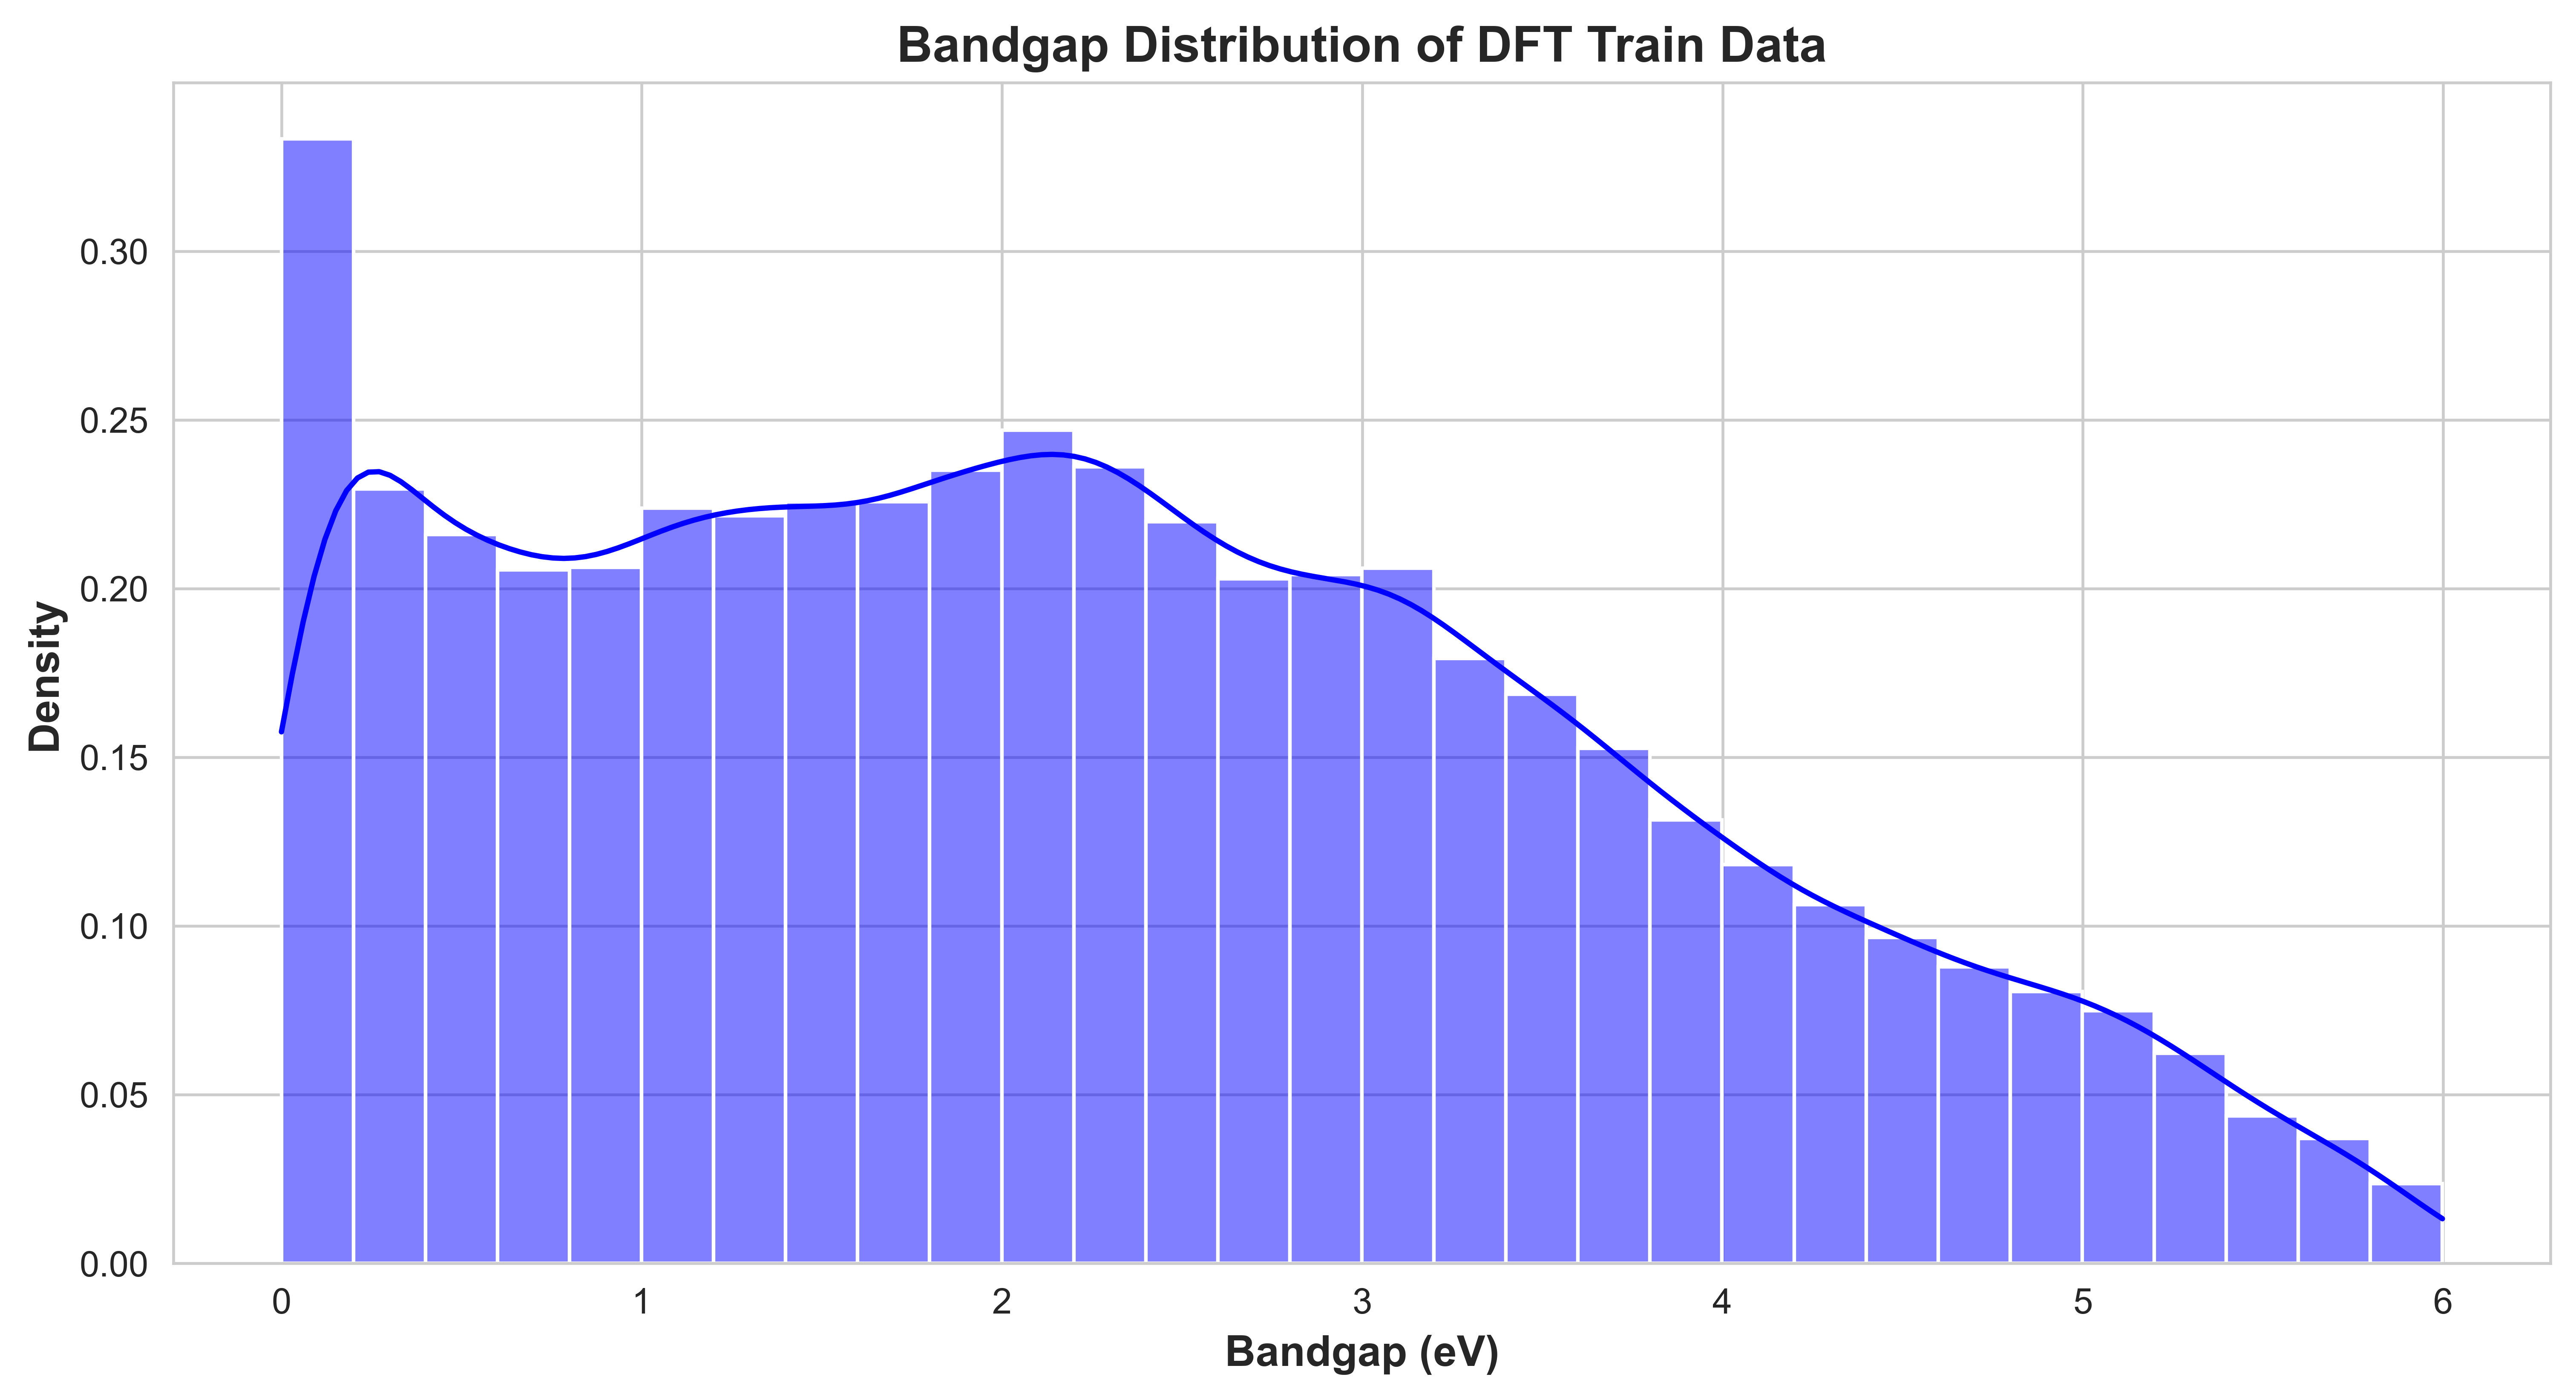

In [18]:
# draw a distribution plot of the bandgap of the dft train data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(dft_train['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution of DFT Train Data", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
# Create the directory if it doesn't exist
save_dir = os.path.join(current_dir, '../figures', 'composition_data_figs', 'train data')
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'dft_train_distribution.png'), dpi=300)
plt.show()

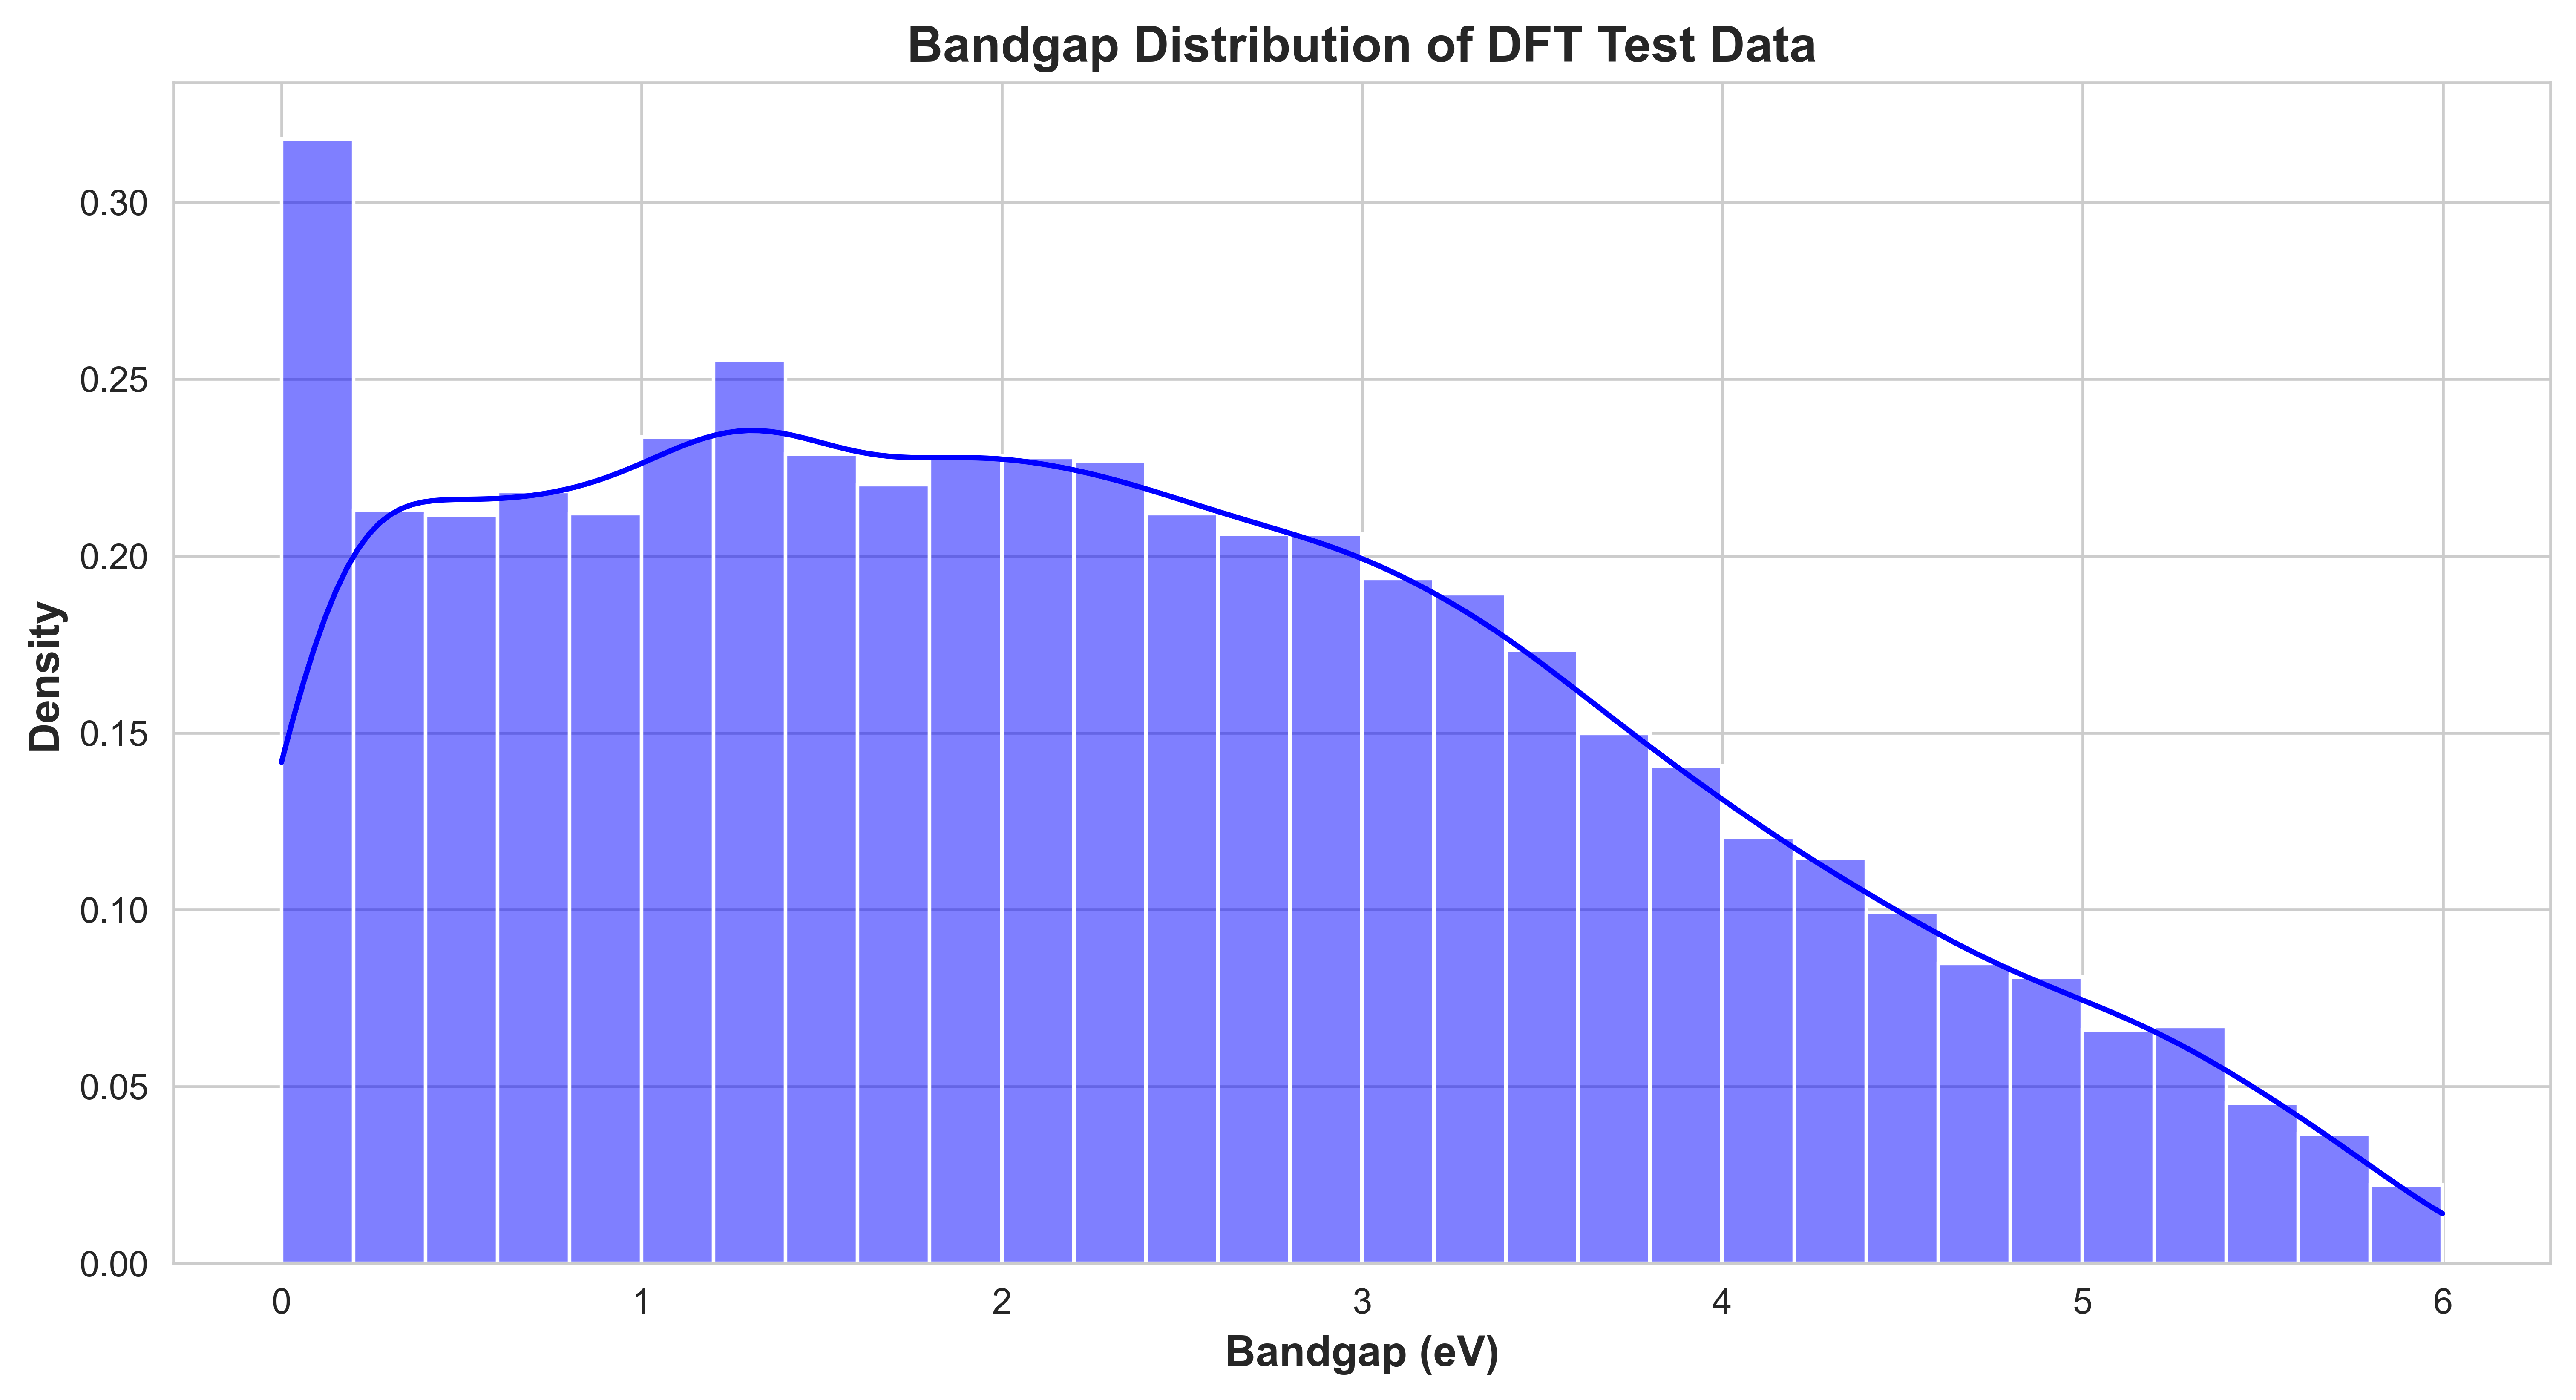

In [19]:
# draw a distribution plot of the bandgap of the dft test data
plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(dft_test['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution of DFT Test Data", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
# Create the directory if it doesn't exist
save_dir = os.path.join(current_dir, '../figures', 'composition_data_figs', 'test data')
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'dft_test_distribution.png'), dpi=300)
plt.show()

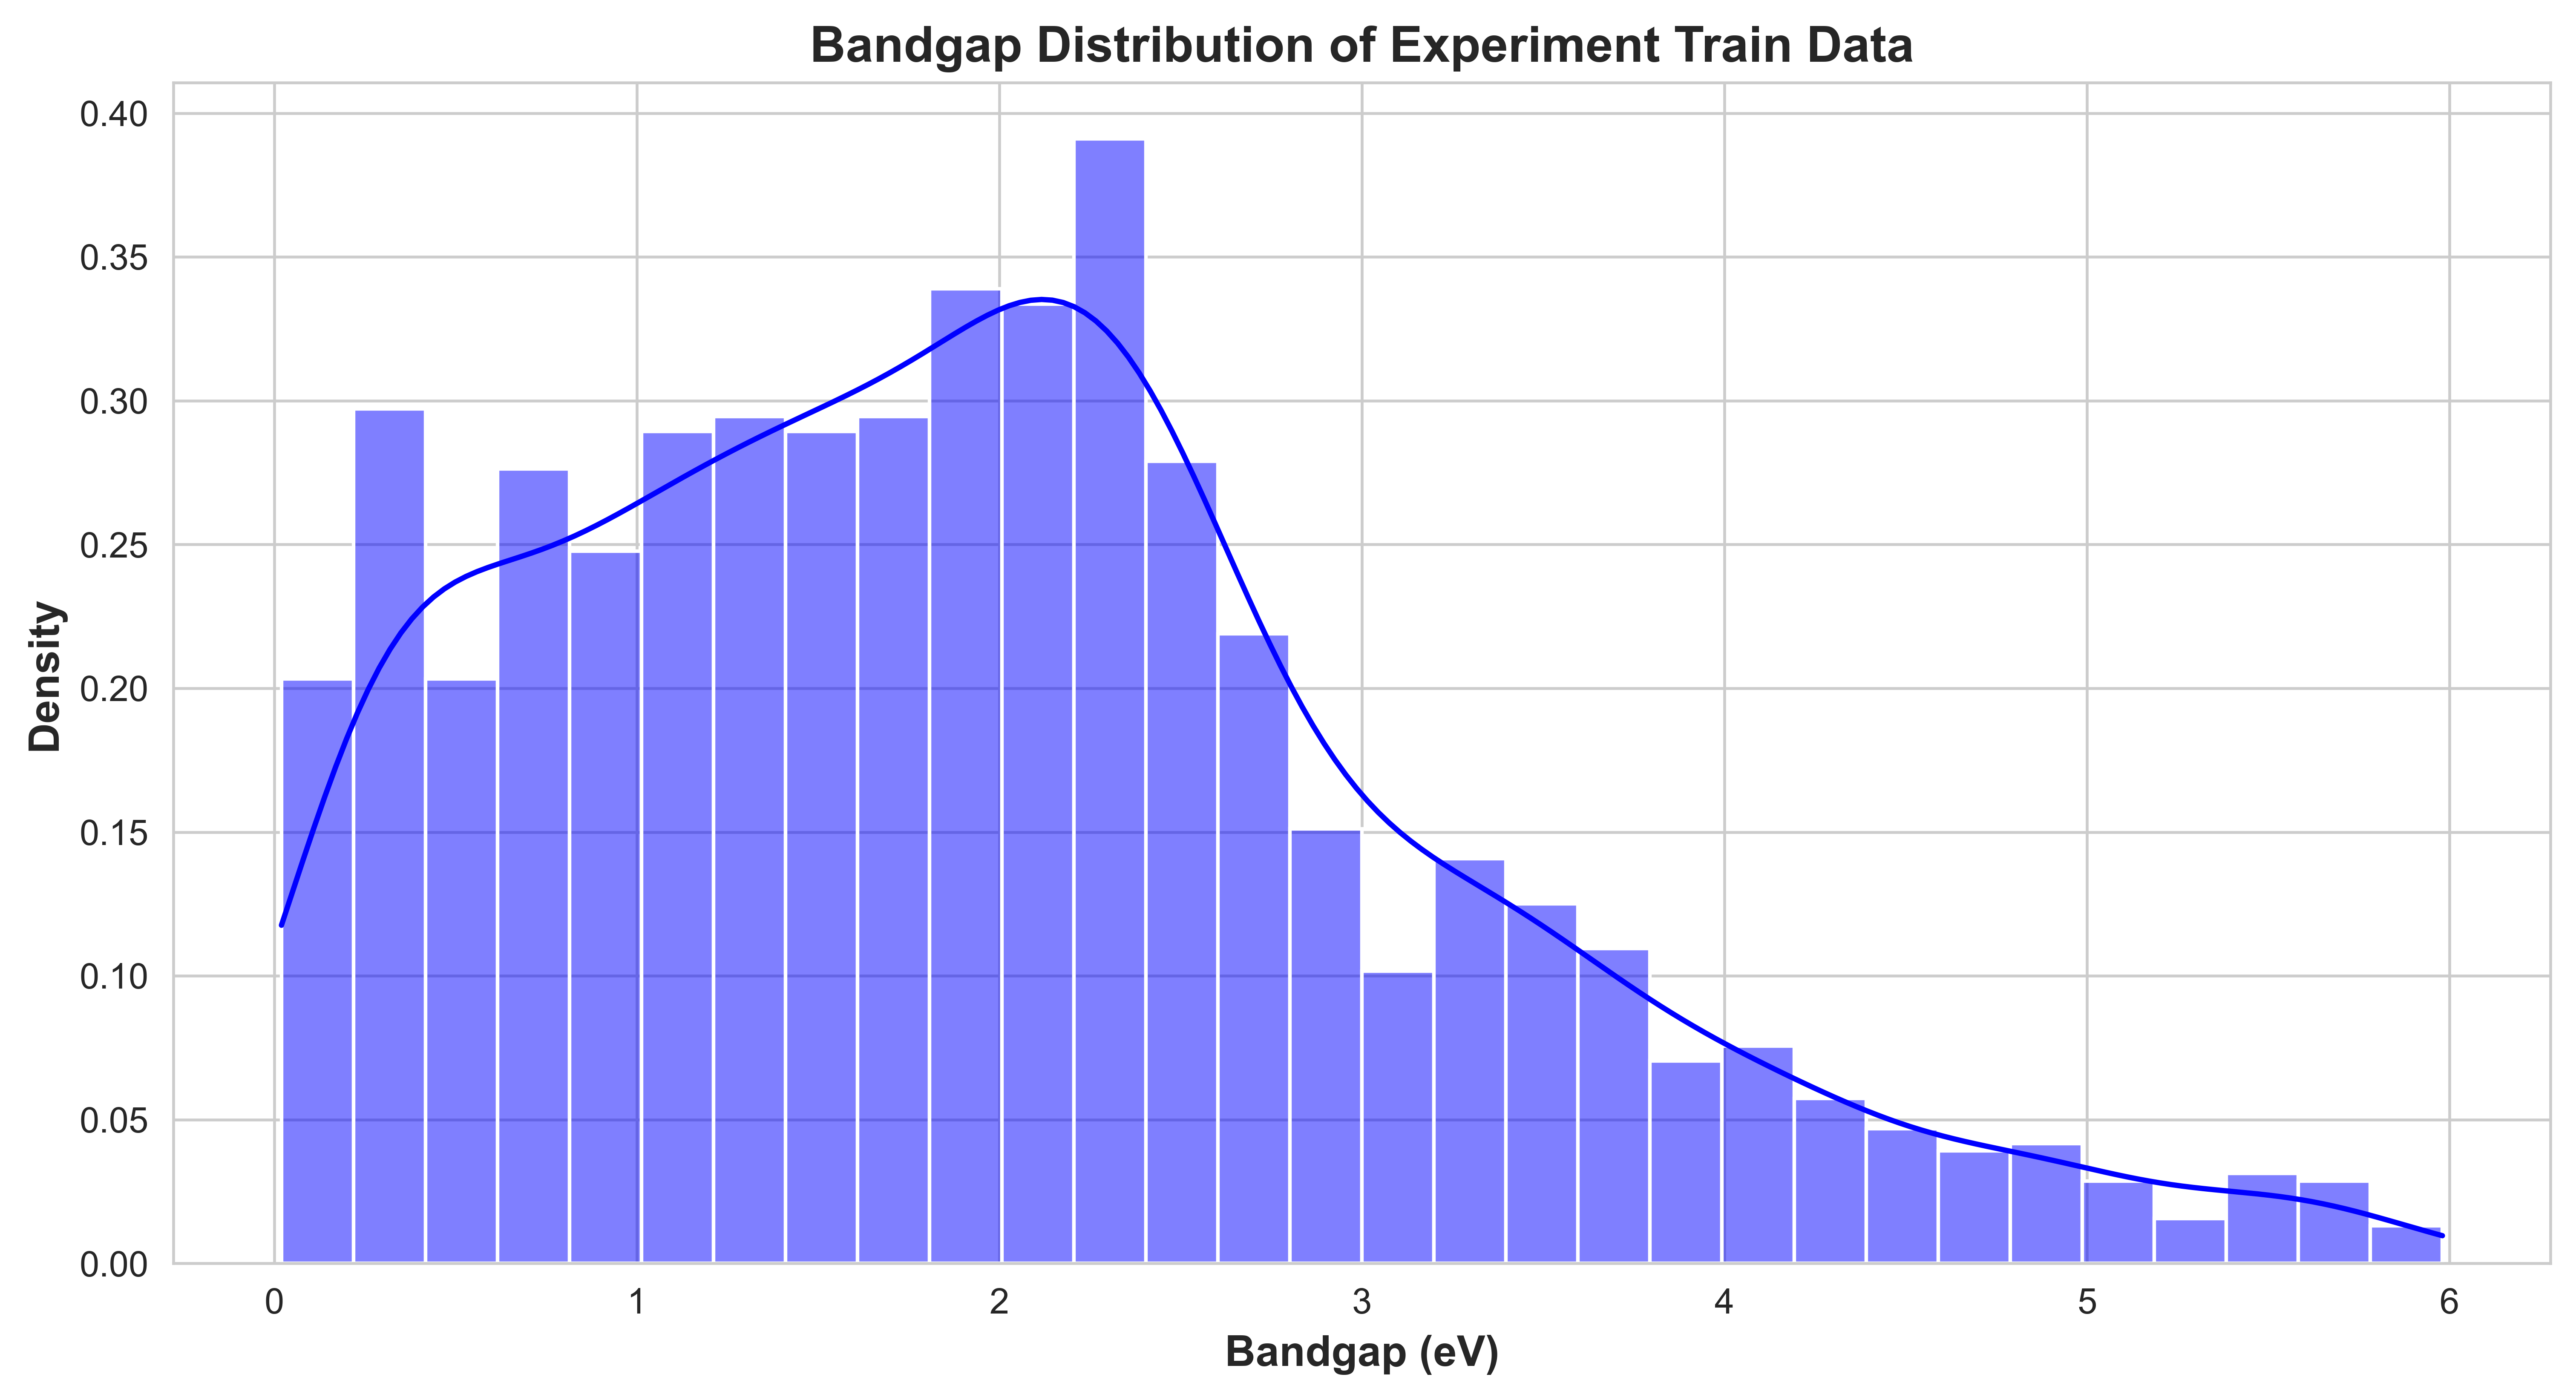

In [20]:
# the exp train data
plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(exp_train['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution of Experiment Train Data", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
# Create the directory if it doesn't exist
save_dir = os.path.join(current_dir, '../figures', 'composition_data_figs', 'train data')
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'exp_train_distribution.png'), dpi=300)
plt.show()

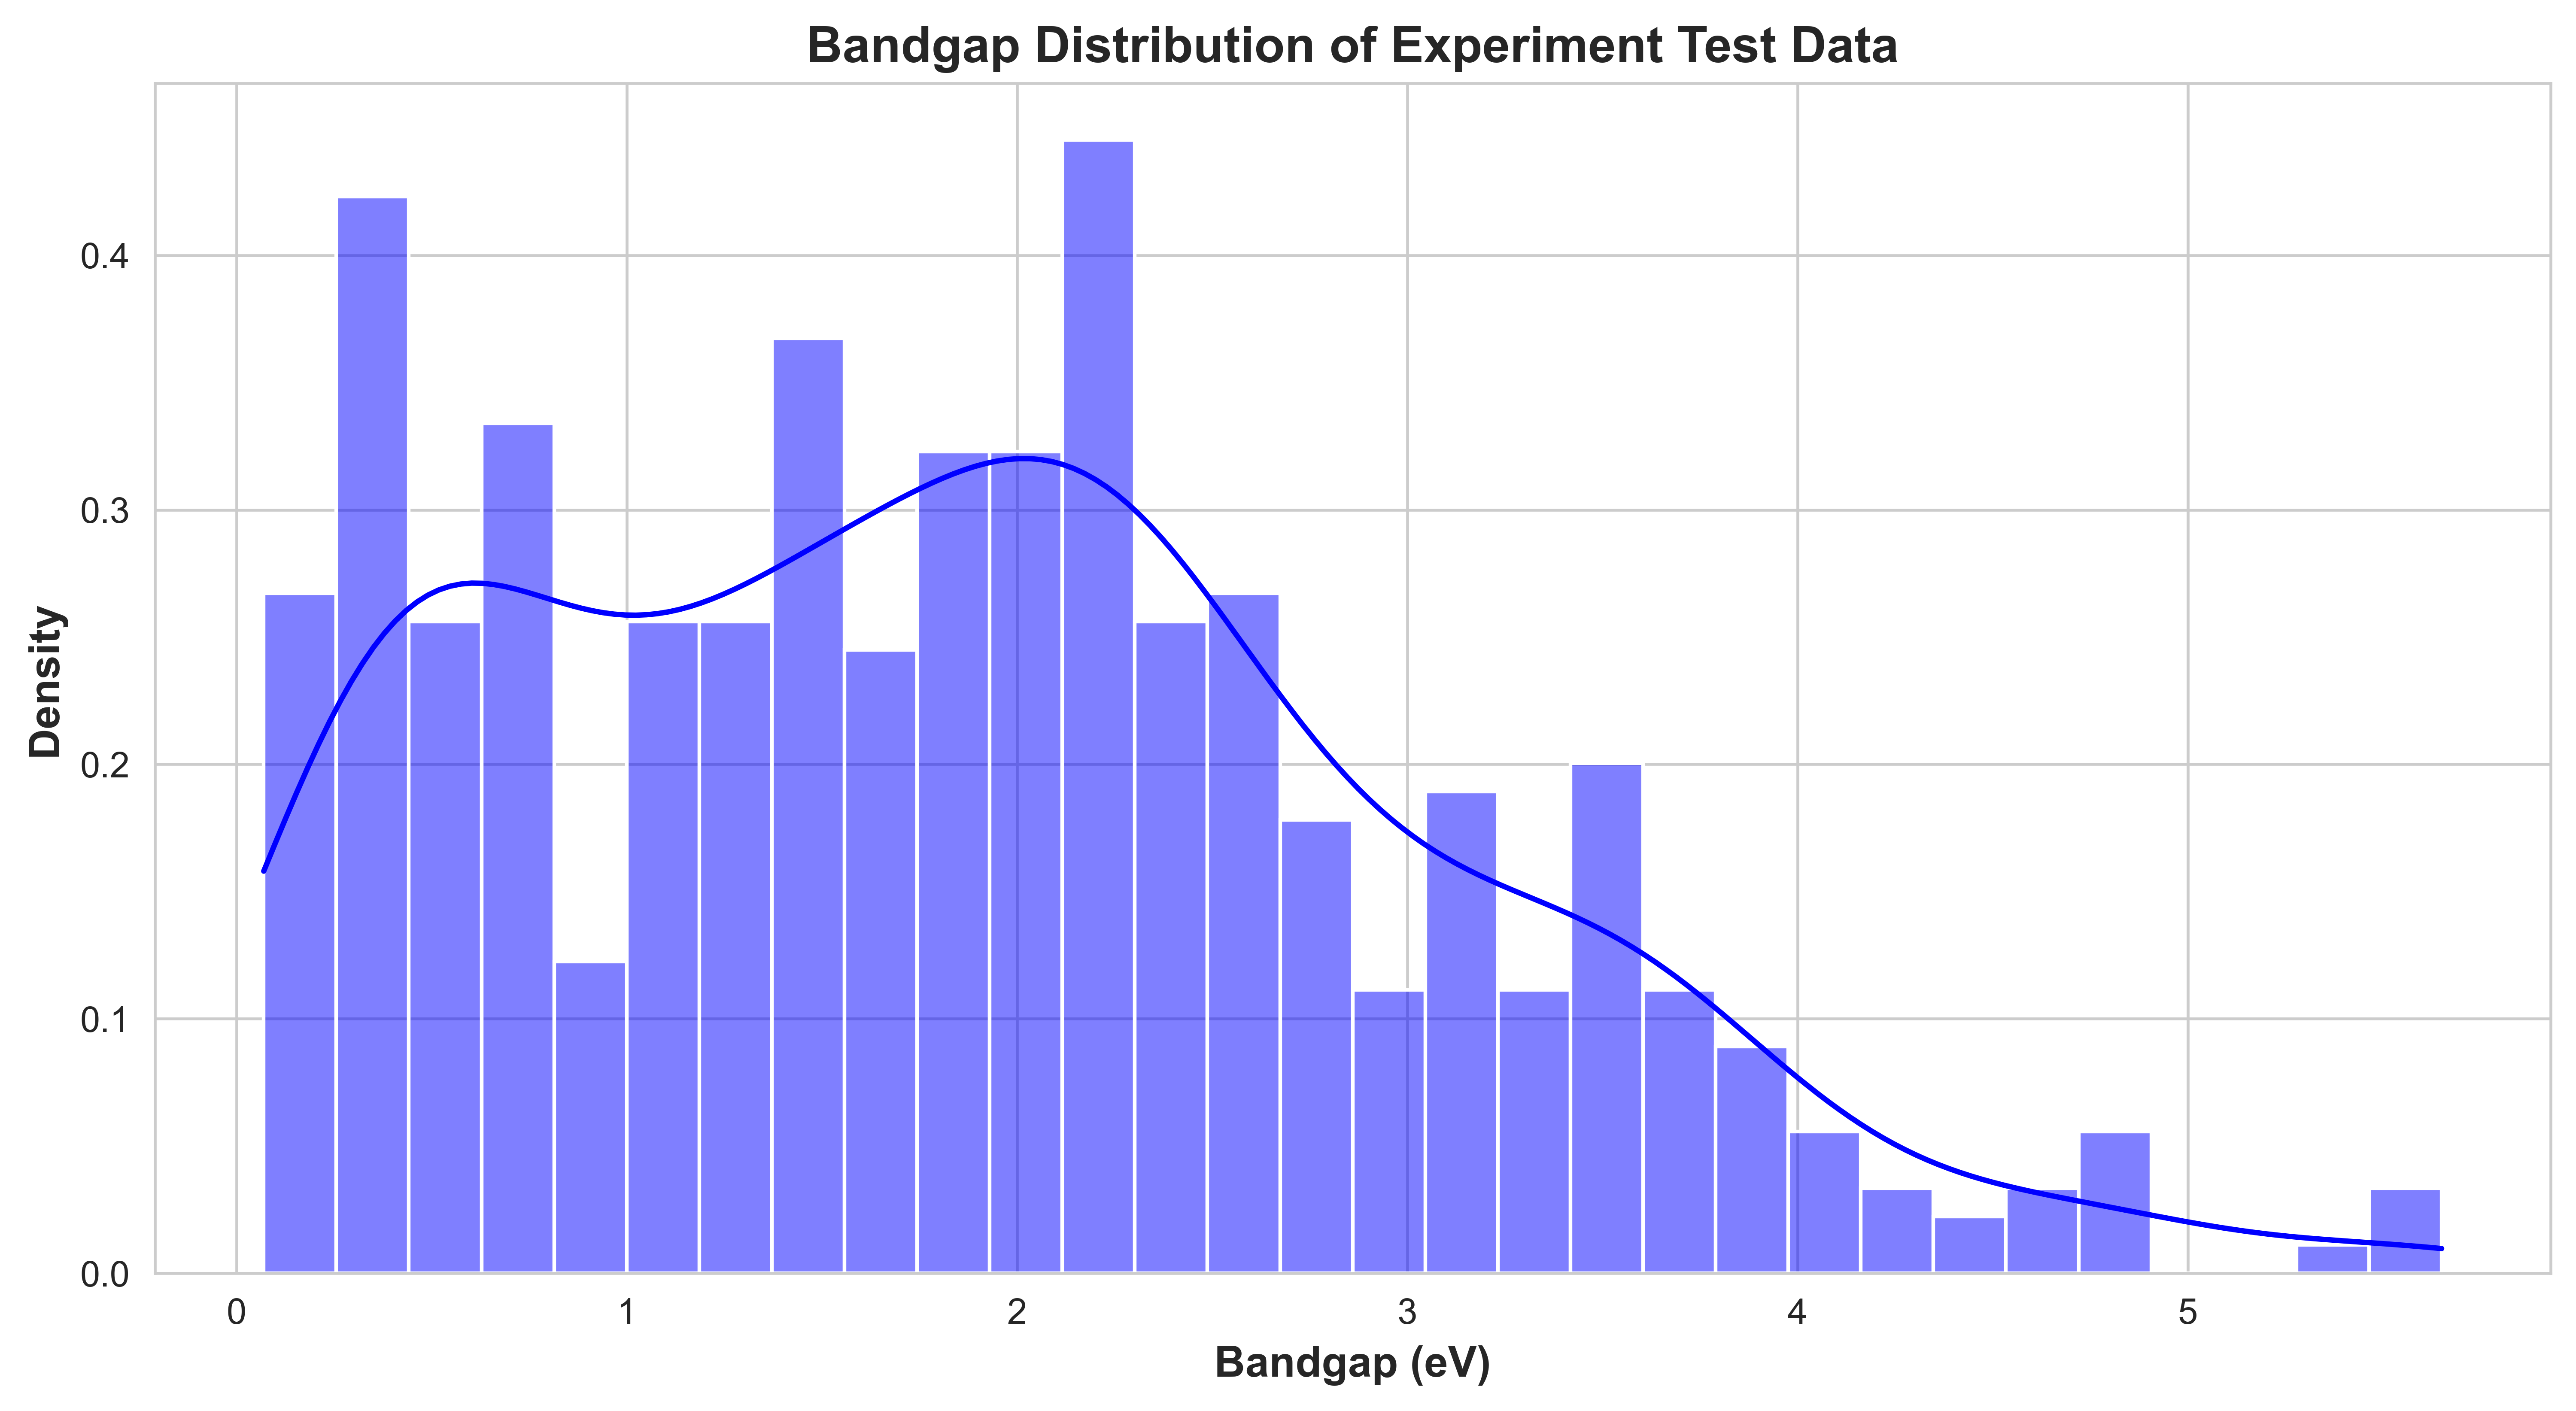

In [21]:
# the exp test data
plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(exp_test['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution of Experiment Test Data", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
# Create the directory if it doesn't exist
save_dir = os.path.join(current_dir, '../figures', 'composition_data_figs', 'test data')
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'exp_test_distribution.png'), dpi=300)
plt.show()